In [1]:
import matplotlib.pyplot as plt  
import matplotlib
import pandas as pd     
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
import seaborn as sns    
import matplotlib.pyplot as plt

In [2]:
#Transfered csv's over, fixed character column as it was showing index number 0
df_Julian = pd.read_csv("Julian Values.csv")
df_Diljit = pd.read_csv("Diljit Values.csv")
df_Tony = pd.read_csv("Tony Values.csv")
df_Harjas = pd.read_csv("Harjas Values.csv")

df_Diljit.rename(columns={'Unnamed: 0':'Character'})
df_Tony.rename(columns={'Unnamed: 0':'Character'})
df_Harjas.rename(columns={'Unnamed: 0':'Character'})
df_Julian.rename(columns={'Unnamed: 0':'Character'})

,Character,Kills,Total Damage,Headshots,Wins,Total Games Played
0,BloodHound,1603,562319,2565,80,1304
1,Gibralter,109,43184,226,5,115
2,Lifeline,1225,383457,1600,68,894
3,Pathfinder,2730,910784,4582,128,1961
4,Wraith,281,92415,391,11,224
5,Bangalore,91,35017,163,6,82
6,Caustic,236,28255,308,10,199
7,Mirage,259,91159,348,7,228
8,Octane,903,307134,1578,45,588
9,Wattson,60,21872,89,1,46


In [3]:
#Created new measured variables of DMG per Kill, DMG per Game, Winrate, Win Percentage, and Accuracy, replicated across all 4 individuals
df_Julian_DMGperKill = df_Julian.loc[:, "Total Damage"] / df_Julian.loc[:, "Kills"]
df_Julian_DMGperKill

df_Julian_DMGperGame = df_Julian.loc[:, "Total Damage"] / df_Julian.loc[:, "Total Games Played"]
df_Julian_DMGperGame

df_Julian_Winrate = df_Julian.loc[:, "Wins"] / df_Julian.loc[:, "Total Games Played"]
df_Julian_Winrate

df_Julian_Wins = df_Julian.loc[:, "Wins"]
df_Julian_totalwingames = df_Julian_Wins.sum()
df_Julian_WinsPercentage = (df_Julian.loc[:, "Wins"]/df_Julian_totalwingames)*100
df_Julian_WinsPercentage

df_Julain_Accuracy = df_Julian.loc[:, "Headshots"] / df_Julian.loc[:, "Total Games Played"]
df_Julain_Accuracy
#There was no true way to measure accuracy as headshot value was based off of total headshots in general, not if the headshot was the killing blow. In order to derive a concept of accuracy I decided to get headshots/total games to get the average amount of headshots pergame, thus showing a form of comparison among the 22 different characters

df_Julian_Final  = pd.concat([df_Julian, df_Julian_DMGperKill, df_Julian_DMGperGame, df_Julian_Winrate, df_Julian_WinsPercentage, df_Julain_Accuracy], axis=1)

df_Julian_Final.columns = ['Characters','Kills','Total Damage','Headshots','Wins','Total Games Played','DMG per Kill','DMG per Game','Win rate','Win Percentage','Accuracy']

df_Julian_Final

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,BloodHound,1603,562319,2565,80,1304,350.791641,431.226227,0.061350,19.184652,1.967025
1,Gibralter,109,43184,226,5,115,396.183486,375.513043,0.043478,1.199041,1.965217
2,Lifeline,1225,383457,1600,68,894,313.026122,428.922819,0.076063,16.306954,1.789709
3,Pathfinder,2730,910784,4582,128,1961,333.620513,464.448751,0.065273,30.695444,2.336563
4,Wraith,281,92415,391,11,224,328.879004,412.566964,0.049107,2.637890,1.745536
5,Bangalore,91,35017,163,6,82,384.802198,427.036585,0.073171,1.438849,1.987805
6,Caustic,236,28255,308,10,199,119.724576,141.984925,0.050251,2.398082,1.547739
7,Mirage,259,91159,348,7,228,351.965251,399.820175,0.030702,1.678657,1.526316
8,Octane,903,307134,1578,45,588,340.126246,522.336735,0.076531,10.791367,2.683673
9,Wattson,60,21872,89,1,46,364.533333,475.478261,0.021739,0.239808,1.934783


In [4]:
df_Diljit_DMGperKill = df_Diljit.loc[:, "Total Damage"] / df_Diljit.loc[:, "Kills"]

df_Diljit_DMGperGame = df_Diljit.loc[:, "Total Damage"] / df_Diljit.loc[:, "Total Games Played"]

df_Diljit_Winrate = df_Diljit.loc[:, "Wins"] / df_Diljit.loc[:, "Total Games Played"]

df_Diljit_Accuracy = df_Diljit.loc[:, "Headshots"] / df_Diljit.loc[:, "Total Games Played"]

df_Diljit_Wins = df_Diljit.loc[:, "Wins"]
df_Diljit_totalwingames = df_Diljit_Wins.sum()
df_Diljit_WinsPercentage = (df_Diljit.loc[:, "Wins"]/df_Diljit_totalwingames)*100

df_Diljit_Final = pd.concat([df_Diljit, df_Diljit_DMGperKill, df_Diljit_DMGperGame, df_Diljit_Winrate, df_Diljit_WinsPercentage, df_Diljit_Accuracy], axis=1)
df_Diljit_Final.columns = ['Characters','Kills','Total Damage','Headshots','Wins','Total Games Played','DMG per Kill','DMG per Game','Win rate','Win Percentage','Accuracy']
df_Diljit_Final

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,BloodHound,163,51204,238,10,115,314.134969,445.252174,0.086957,3.333333,2.069565
1,Gibralter,131,42527,174,9,114,324.633588,373.043860,0.078947,3.000000,1.526316
2,Lifeline,90,29764,134,8,88,330.711111,338.227273,0.090909,2.666667,1.522727
3,Pathfinder,1880,580883,2419,101,1500,308.980319,387.255333,0.067333,33.666667,1.612667
4,Wraith,101,31371,113,4,85,310.603960,369.070588,0.047059,1.333333,1.329412
5,Bangalore,148,45135,162,10,115,304.966216,392.478261,0.086957,3.333333,1.408696
6,Caustic,103,29873,118,5,78,290.029126,382.987179,0.064103,1.666667,1.512821
7,Mirage,59,17308,67,3,49,293.355932,353.224490,0.061224,1.000000,1.367347
8,Octane,586,167188,742,45,443,285.303754,377.399549,0.101580,15.000000,1.674944
9,Wattson,77,23942,101,5,57,310.935065,420.035088,0.087719,1.666667,1.771930


In [5]:
df_Tony_DMGperKill = df_Tony.loc[:, "Total Damage"] / df_Tony.loc[:, "Kills"]

df_Tony_DMGperGame = df_Tony.loc[:, "Total Damage"] / df_Tony.loc[:, "Total Games Played"]

df_Tony_Winrate = df_Tony.loc[:, "Wins"] / df_Tony.loc[:, "Total Games Played"]

df_Tony_Accuracy = df_Tony.loc[:, "Headshots"] / df_Tony.loc[:, "Total Games Played"]

df_Tony_Wins = df_Tony.loc[:, "Wins"]
df_Tony_totalwingames = df_Tony_Wins.sum()
df_Tony_WinsPercentage = (df_Tony.loc[:, "Wins"]/df_Tony_totalwingames)*100

df_Tony_Final = pd.concat([df_Tony, df_Tony_DMGperKill, df_Tony_DMGperGame, df_Tony_Winrate, df_Tony_WinsPercentage, df_Tony_Accuracy], axis=1)
df_Tony_Final.columns = ['Characters','Kills','Total Damage','Headshots','Wins','Total Games Played','DMG per Kill','DMG per Game','Win rate','Win Percentage','Accuracy']
df_Tony_Final

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,BloodHound,156,58605,250,10,149,375.673077,393.322148,0.067114,3.906250,1.677852
1,Gibralter,132,53515,243,7,132,405.416667,405.416667,0.053030,2.734375,1.840909
2,Lifeline,205,84052,329,14,172,410.009756,488.674419,0.081395,5.468750,1.912791
3,Pathfinder,261,112974,565,14,288,432.850575,392.270833,0.048611,5.468750,1.961806
4,Wraith,123,55481,221,9,119,451.065041,466.226891,0.075630,3.515625,1.857143
5,Bangalore,53,21756,84,3,55,410.490566,395.563636,0.054545,1.171875,1.527273
6,Caustic,97,34324,128,7,61,353.855670,562.688525,0.114754,2.734375,2.098361
7,Mirage,57,19507,95,2,47,342.228070,415.042553,0.042553,0.781250,2.021277
8,Octane,1316,505373,2217,85,1111,384.022036,454.881188,0.076508,33.203125,1.995500
9,Wattson,80,33488,139,5,78,418.600000,429.333333,0.064103,1.953125,1.782051


In [6]:
#Harjas had multiple unplayed characters, had to fill their NaN values in with 0 so calculations could compute properly
df_Harjas_DMGperKill = df_Harjas.loc[:, "Total Damage"] / df_Harjas.loc[:, "Kills"]

df_Harjas_DMGperGame = df_Harjas.loc[:, "Total Damage"] / df_Harjas.loc[:, "Total Games Played"]

df_Harjas_Winrate = df_Harjas.loc[:, "Wins"] / df_Harjas.loc[:, "Total Games Played"]

df_Harjas_Accuracy = df_Harjas.loc[:, "Headshots"] / df_Harjas.loc[:, "Total Games Played"]

df_Harjas_Wins = df_Harjas.loc[:, "Wins"]
df_Harjas_totalwingames = df_Harjas_Wins.sum()
df_Harjas_WinsPercentage = (df_Harjas.loc[:, "Wins"]/df_Harjas_totalwingames)*100

df_Harjas_Final = pd.concat([df_Harjas, df_Harjas_DMGperKill, df_Harjas_DMGperGame, df_Harjas_Winrate,df_Harjas_WinsPercentage, df_Harjas_Accuracy], axis=1)
df_Harjas_Final.columns = ['Characters','Kills','Total Damage','Headshots','Wins','Total Games Played','DMG per Kill','DMG per Game','Win rate','Win Percentage','Accuracy']
df_Harjas_Final['DMG per Kill'] = df_Harjas_Final['DMG per Kill'].fillna(0)
df_Harjas_Final['DMG per Game'] = df_Harjas_Final['DMG per Game'].fillna(0)
df_Harjas_Final['Win rate'] = df_Harjas_Final['Win rate'].fillna(0)
df_Harjas_Final['Accuracy'] = df_Harjas_Final['Accuracy'].fillna(0)

df_Harjas_Final

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,BloodHound,2,705,0,0,6,352.500000,117.500000,0.000000,0.000000,0.000000
1,Gibralter,136,43022,236,6,274,316.338235,157.014599,0.021898,4.477612,0.861314
2,Lifeline,1133,367142,1697,67,1666,324.044131,220.373349,0.040216,50.000000,1.018607
3,Pathfinder,259,84392,397,8,455,325.837838,185.476923,0.017582,5.970149,0.872527
4,Wraith,7,2120,5,0,11,302.857143,192.727273,0.000000,0.000000,0.454545
5,Bangalore,781,305400,1328,51,1773,391.037132,172.250423,0.028765,38.059701,0.749013
6,Caustic,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,Mirage,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Octane,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,Wattson,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#Creation of the avg chart comparison
df_Julian_Avg = df_Julian_Final.mean(axis=0)
df_Diljit_Avg = df_Diljit_Final.mean(axis=0)
df_Tony_Avg = df_Tony_Final.mean(axis=0)
df_Harjas_Avg = df_Harjas_Final.mean(axis=0)

df_Avgs = pd.concat([df_Julian_Avg, df_Diljit_Avg, df_Tony_Avg, df_Harjas_Avg], axis=1)
df_Avgs.columns = ['Julian','Diljit','Tony','Harjas']
df_Avgs

C:\Users\Diljit Singh\AppData\Local\Temp\ipykernel_22608\1661154129.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Julian_Avg = df_Julian_Final.mean(axis=0)
C:\Users\Diljit Singh\AppData\Local\Temp\ipykernel_22608\1661154129.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Diljit_Avg = df_Diljit_Final.mean(axis=0)
C:\Users\Diljit Singh\AppData\Local\Temp\ipykernel_22608\1661154129.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Tony_Avg = df_Tony_Final.mean(axis=0)

,Julian,Diljit,Tony,Harjas
Kills,390.863636,221.772727,185.818182,106.318182
Total Damage,129162.954545,71297.681818,74187.090909,36797.545455
Headshots,615.454545,282.863636,327.227273,167.636364
Wins,18.954545,13.636364,11.636364,6.090909
Total Games Played,290.045455,176.863636,169.000000,192.000000
DMG per Kill,335.777970,332.100677,428.582043,146.567147
DMG per Game,467.254490,427.312493,422.035708,84.887377
Win rate,0.064684,0.086759,0.066336,0.007863
Win Percentage,4.545455,4.545455,4.545455,4.545455
Accuracy,2.298738,1.712698,1.830071,0.329588


In [8]:
#Below is translation of mean values into a bar graph 

Text(0.5, 1.0, 'Avg Kills Across All Characters Per Individual')

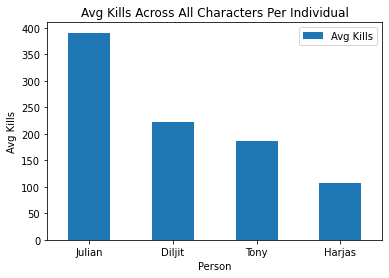

In [9]:
df = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg Kills':[390.863636, 221.772727, 185.818182,106.318182]})
ax = df.plot.bar(x='Person', y='Avg Kills', rot=0)
ax.set_ylabel('Avg Kills')
ax.set_title('Avg Kills Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg Damage Across All Characters Per Individual')

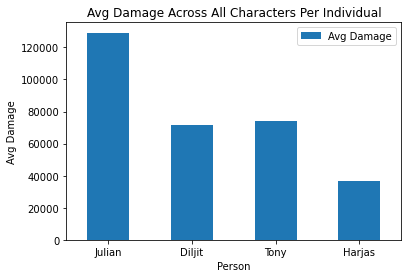

In [10]:
df1 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg Damage':[129162.954545, 71297.681818, 74187.090909,36797.545455]})
ax = df1.plot.bar(x='Person', y='Avg Damage', rot=0)
ax.set_ylabel('Avg Damage')
ax.set_title('Avg Damage Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg Wins Across All Characters Per Individual')

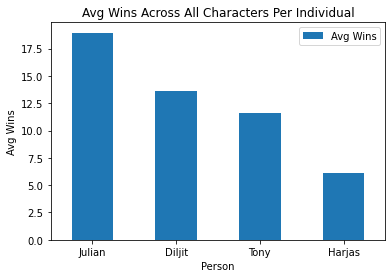

In [11]:
df2 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg Wins':[18.954545, 13.636364, 11.636364,6.090909]})
ax = df2.plot.bar(x='Person', y='Avg Wins', rot=0)
ax.set_ylabel('Avg Wins')
ax.set_title('Avg Wins Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg DMG per Kill Across All Characters Per Individual')

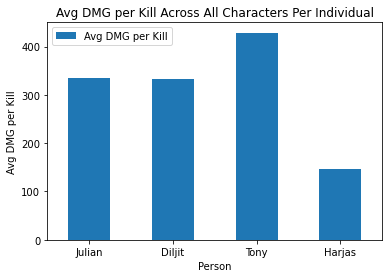

In [12]:
df3 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg DMG per Kill':[335.777970, 332.100677, 428.582043,146.567147]})
ax = df3.plot.bar(x='Person', y='Avg DMG per Kill', rot=0)
ax.set_ylabel('Avg DMG per Kill')
ax.set_title('Avg DMG per Kill Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg DMG per Game Across All Characters Per Individual')

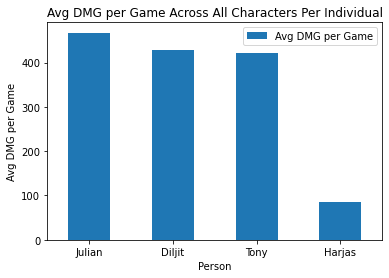

In [13]:
df4 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg DMG per Game':[467.254490, 427.312493, 422.035708,84.887377]})
ax = df4.plot.bar(x='Person', y='Avg DMG per Game', rot=0)
ax.set_ylabel('Avg DMG per Game')
ax.set_title('Avg DMG per Game Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg Accuracy per Game Across All Characters Per Individual')

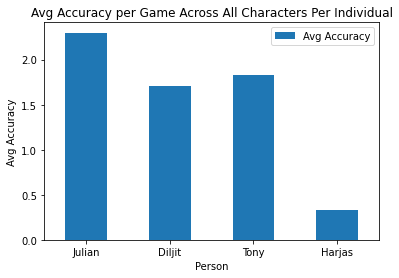

In [14]:
df5 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg Accuracy':[2.298738, 1.712698, 1.830071,0.329588]})
ax = df5.plot.bar(x='Person', y='Avg Accuracy', rot=0)
ax.set_ylabel('Avg Accuracy')
ax.set_title('Avg Accuracy per Game Across All Characters Per Individual')

Text(0.5, 1.0, 'Avg Win rate per Game Across All Characters Per Individual')

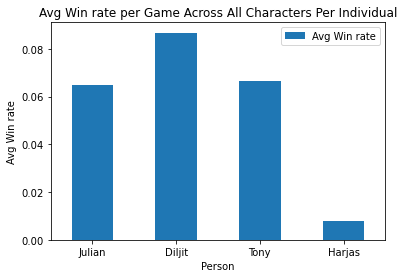

In [15]:
df5 = pd.DataFrame({'Person':['Julian', 'Diljit', 'Tony', 'Harjas'], 'Avg Win rate':[0.064684, 0.086759, 0.066336,0.007863]})
ax = df5.plot.bar(x='Person', y='Avg Win rate', rot=0)
ax.set_ylabel('Avg Win rate')
ax.set_title('Avg Win rate per Game Across All Characters Per Individual')

In [16]:
#Next I created the comparison of all our individual chararcter stats

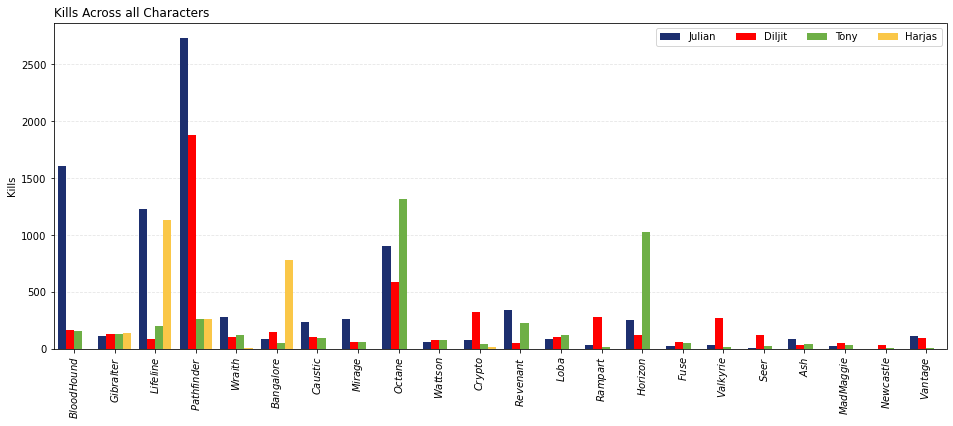

In [17]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Kills'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Kills'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Kills'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Kills'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Kills')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Kills Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

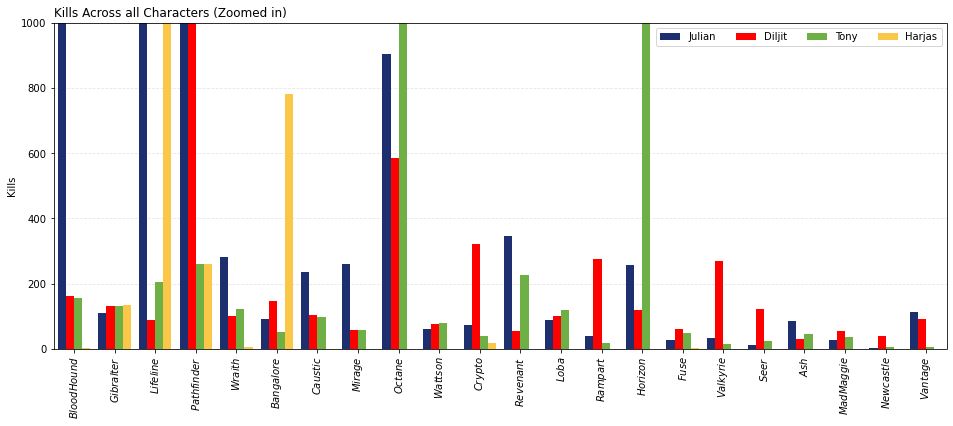

In [18]:
#Same graph as above but zoomed in for smaller value comparison (Where Max Y value is 1000)
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Kills'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Kills'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Kills'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Kills'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Kills')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
plt.ylim (0,1000)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Kills Across all Characters (Zoomed in)', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

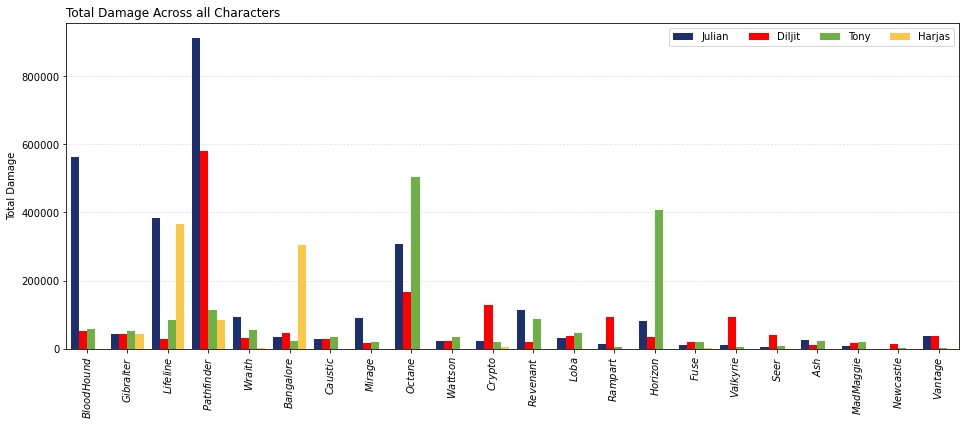

In [19]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Total Damage'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Total Damage'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Total Damage'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Total Damage'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Total Damage')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Total Damage Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

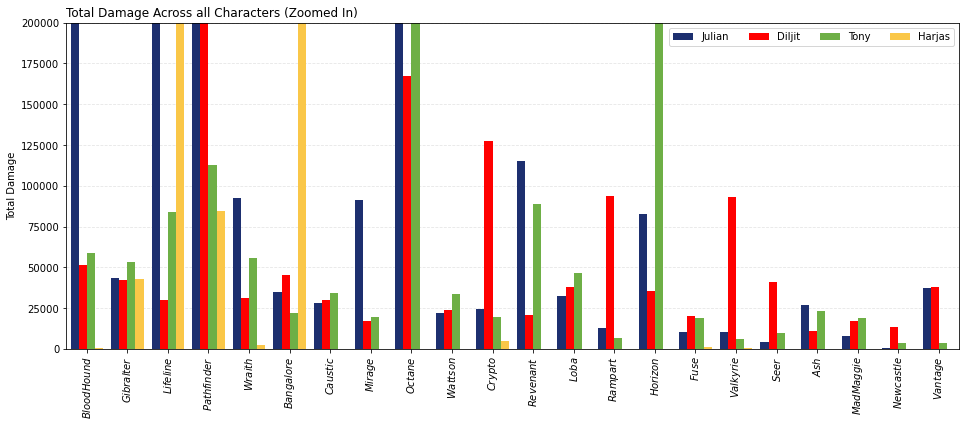

In [20]:
#Same as above graph but just zoomed in, ylimit is 200000
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Total Damage'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Total Damage'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Total Damage'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Total Damage'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Total Damage')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
plt.ylim (0,200000)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Total Damage Across all Characters (Zoomed In)', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

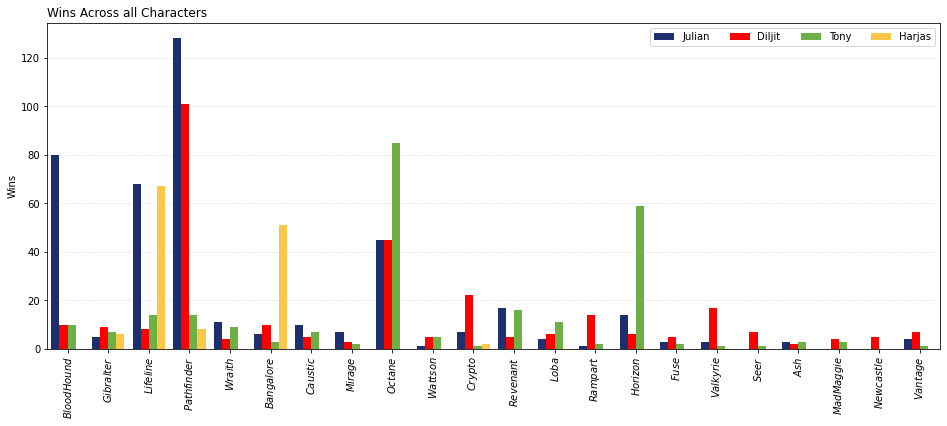

In [21]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Wins'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Wins'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Wins'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Wins'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Wins')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Wins Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

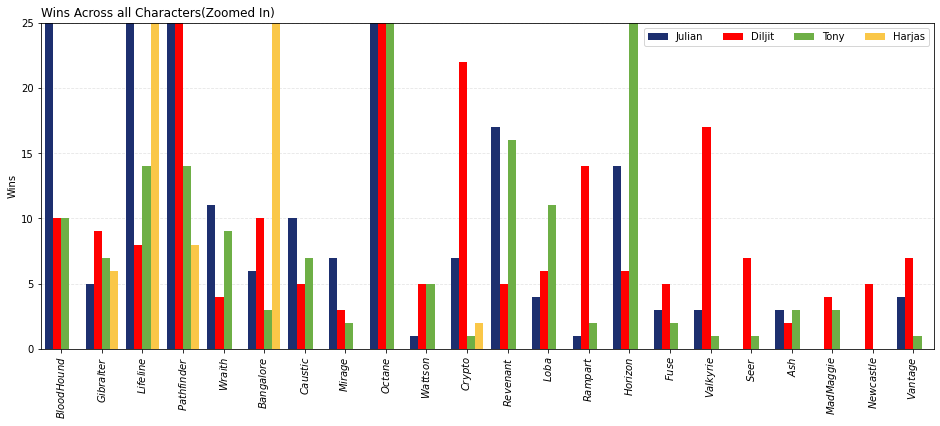

In [22]:
#Same graph as above but zoomed in, ylimit is 25 wins
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Wins'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Wins'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Wins'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Wins'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Wins')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
plt.ylim (0,25)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Wins Across all Characters(Zoomed In)', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

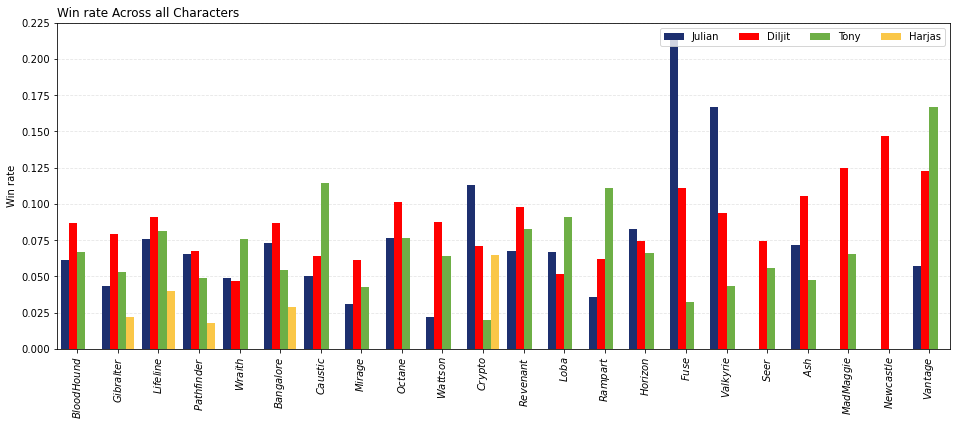

In [23]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Win rate'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Win rate'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Win rate'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Win rate'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Win rate')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Win rate Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper right', ncol = 4)
plt.show()

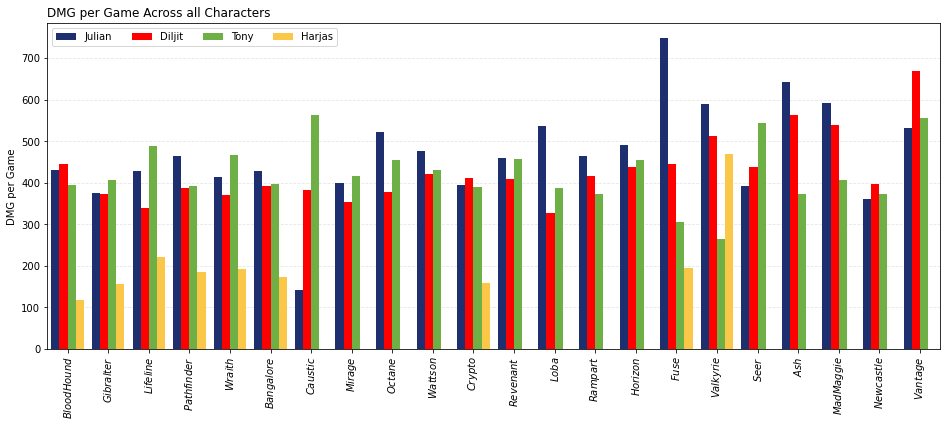

In [24]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['DMG per Game'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['DMG per Game'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['DMG per Game'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['DMG per Game'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('DMG per Game')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('DMG per Game Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

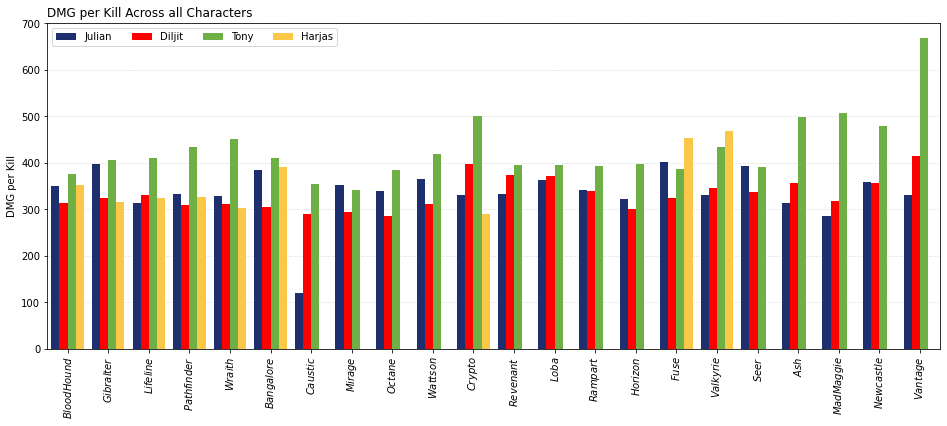

In [25]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['DMG per Kill'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['DMG per Kill'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['DMG per Kill'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['DMG per Kill'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('DMG per Kill')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('DMG per Kill Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

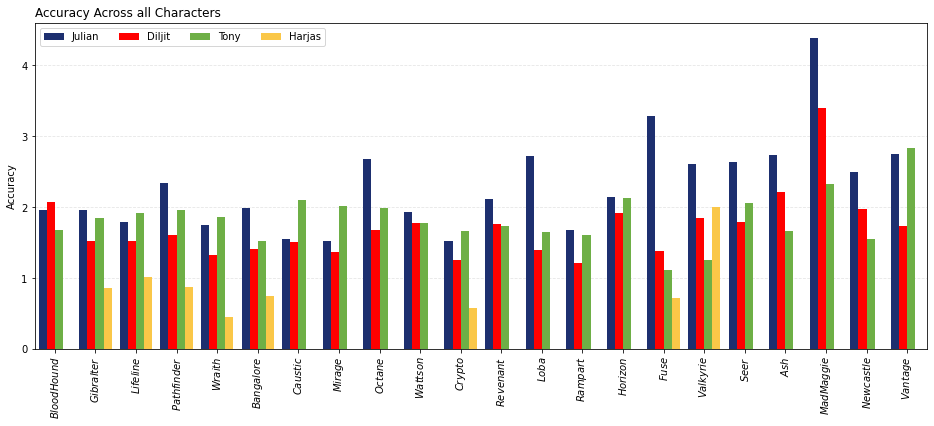

In [26]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Final['Characters']))
# plot bars
plt.bar(x - 0.3, df_Julian_Final['Accuracy'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Final['Accuracy'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Final['Accuracy'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Final['Accuracy'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Accuracy')
plt.xticks(x, df_Julian_Final.index,rotation=90)
ax.set_xticklabels((['$BloodHound$', '$Gibralter$', '$Lifeline$','$Pathfinder$','$Wraith$','$Bangalore$','$Caustic$','$Mirage$','$Octane$','$Wattson$','$Crypto$','$Revenant$','$Loba$','$Rampart$','$Horizon$','$Fuse$','$Valkyrie$','$Seer$','$Ash$','$Mad Maggie$','$Newcastle$','$Vantage$']))
plt.xlim(-0.5, 21.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Accuracy Across all Characters', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

In [27]:
#Additional figures to explore each individuals original value correlations 

Text(0.5, 1.0, "Julian's Kills vs Total Damage")

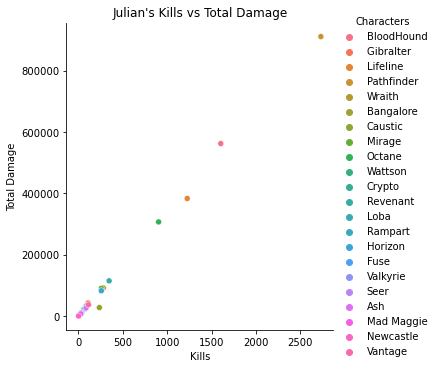

In [28]:
sns.relplot(x='Kills', y='Total Damage', data=df_Julian_Final,hue='Characters')
plt.title("Julian's Kills vs Total Damage")

Text(0.5, 1.0, "Julian's Wins vs Total Games Played")

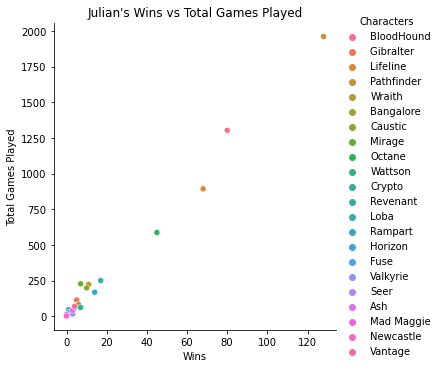

In [29]:
sns.relplot(x='Wins', y='Total Games Played', data=df_Julian_Final,hue='Characters')
plt.title("Julian's Wins vs Total Games Played")

Text(0.5, 1.0, "Diljit's Kills vs Total Damage")

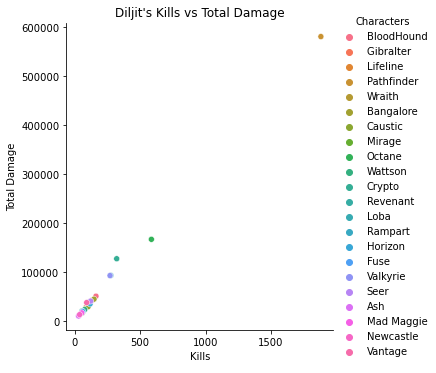

In [30]:
sns.relplot(x='Kills', y='Total Damage', data=df_Diljit_Final,hue='Characters')
plt.title("Diljit's Kills vs Total Damage")

Text(0.5, 1.0, "Diljit's Wins vs Total Games Played")

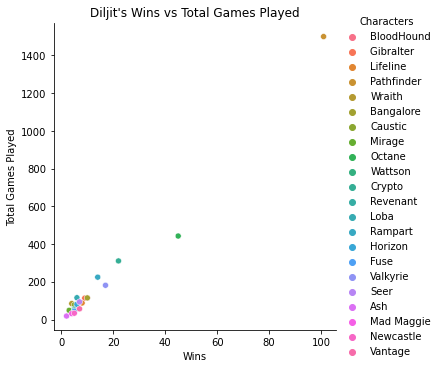

In [31]:
sns.relplot(x='Wins', y='Total Games Played', data=df_Diljit_Final,hue='Characters')
plt.title("Diljit's Wins vs Total Games Played")

Text(0.5, 1.0, "Tony's Kills vs Total Damage")

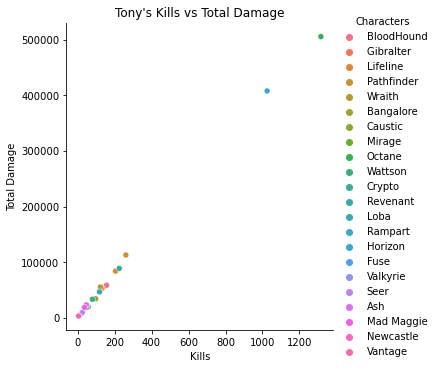

In [32]:
sns.relplot(x='Kills', y='Total Damage', data=df_Tony_Final,hue='Characters')
plt.title("Tony's Kills vs Total Damage")

Text(0.5, 1.0, "Tony's Wins vs Total Games Played")

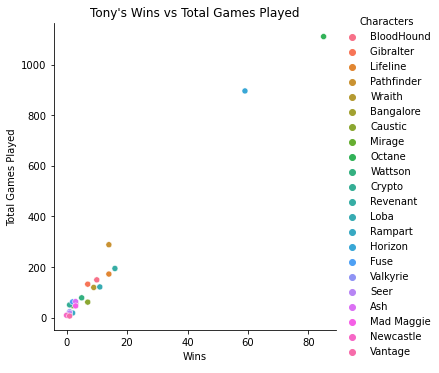

In [33]:
sns.relplot(x='Wins', y='Total Games Played', data=df_Tony_Final,hue='Characters')
plt.title("Tony's Wins vs Total Games Played")

Text(0.5, 1.0, "Harjas's Kills vs Total Damage")

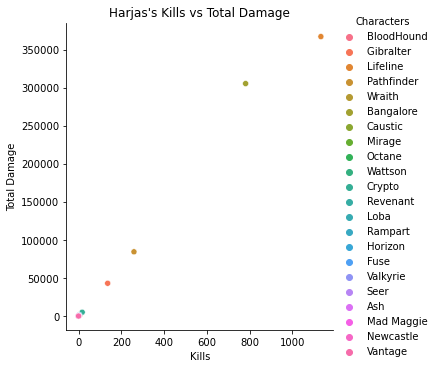

In [34]:
sns.relplot(x='Kills', y='Total Damage', data=df_Harjas_Final,hue='Characters')
plt.title("Harjas's Kills vs Total Damage")

Text(0.5, 1.0, "Harjas's Wins vs Total Games Played")

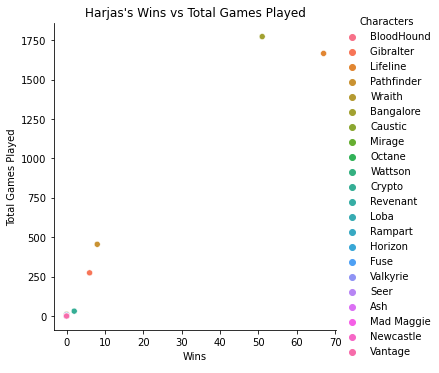

In [35]:
sns.relplot(x='Wins', y='Total Games Played', data=df_Harjas_Final,hue='Characters')
plt.title("Harjas's Wins vs Total Games Played")

In [36]:
#The next goal was to determine each individuals top 3 main characters/top 3 winning characters

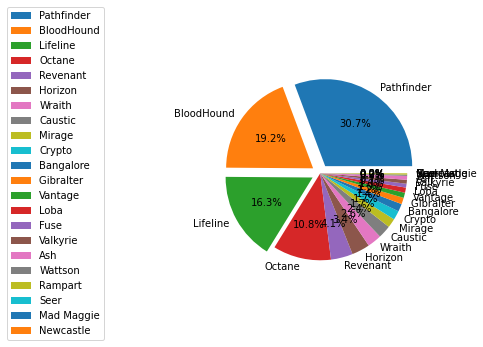

In [37]:
#Creating a pie chart with exploded view to easily distinguish the top 3 won characters 
df_Julian_Final = df_Julian_Final.sort_values('Wins',ascending=False)
explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(df_Julian_Final['Wins'], labels = df_Julian_Final['Characters'],autopct='%1.1f%%', explode=explode)
plt.legend(loc='right', borderaxespad=32.5, labels  = df_Julian_Final['Characters'])
plt.show()

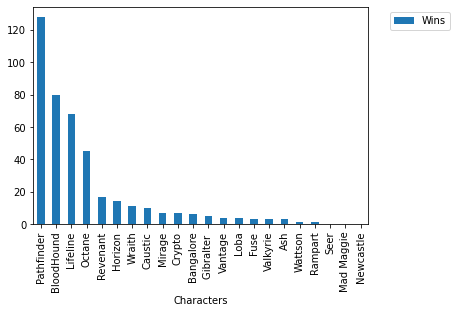

In [38]:
#Same as pie chart but in bar chart format to easily determine
df_Julian_Final.plot.bar(x='Characters', y='Wins')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
#Raw percentages dataframe for pie chart
df_Julian_WinsPercentage.sort_values
df_Julian_Winstats = pd.concat([df_Julian_Final.loc[:,"Characters"],df_Julian_WinsPercentage], axis=1)
df_Julian_Winstats

,Characters,Wins
3,Pathfinder,30.695444
0,BloodHound,19.184652
2,Lifeline,16.306954
8,Octane,10.791367
11,Revenant,4.076739
14,Horizon,3.357314
4,Wraith,2.637890
6,Caustic,2.398082
7,Mirage,1.678657
10,Crypto,1.678657


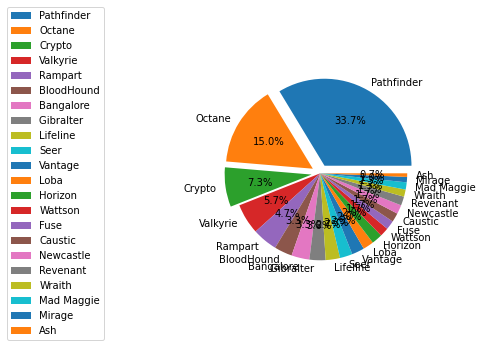

In [40]:
df_Diljit_Final = df_Diljit_Final.sort_values('Wins',ascending=False)
explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(df_Diljit_Final['Wins'], labels = df_Diljit_Final['Characters'],autopct='%1.1f%%', explode=explode)
plt.legend(loc='right', borderaxespad=32.5, labels  = df_Diljit_Final['Characters'])
plt.show()

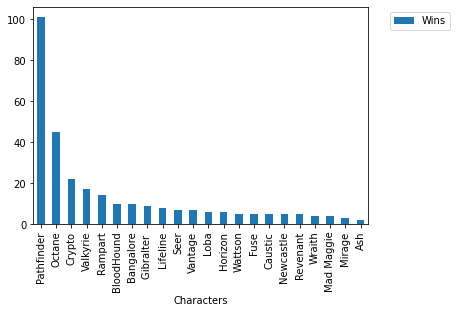

In [41]:
df_Diljit_Final.plot.bar(x='Characters', y='Wins')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [42]:
df_Diljit_WinsPercentage.sort_values
df_Diljit_Winstats = pd.concat([df_Diljit_Final.loc[:,"Characters"],df_Diljit_WinsPercentage], axis=1)
df_Diljit_Winstats

,Characters,Wins
3,Pathfinder,33.666667
8,Octane,15.000000
10,Crypto,7.333333
16,Valkyrie,5.666667
13,Rampart,4.666667
0,BloodHound,3.333333
5,Bangalore,3.333333
1,Gibralter,3.000000
2,Lifeline,2.666667
17,Seer,2.333333


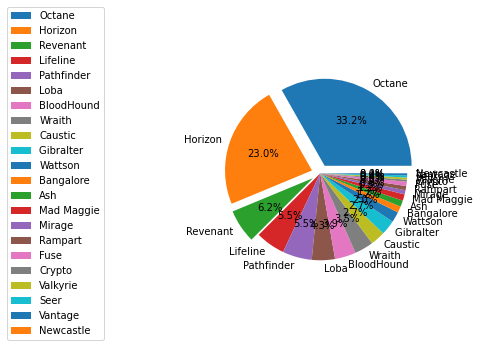

In [43]:
df_Tony_Final = df_Tony_Final.sort_values('Wins',ascending=False)
explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(df_Tony_Final['Wins'], labels = df_Tony_Final['Characters'],autopct='%1.1f%%', explode=explode)
plt.legend(loc='right', borderaxespad=32.5, labels  = df_Tony_Final['Characters'])
plt.show()

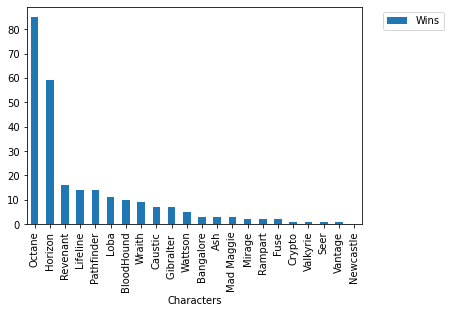

In [44]:
df_Tony_Final.plot.bar(x='Characters', y='Wins')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [45]:
df_Tony_WinsPercentage.sort_values
df_Tony_Winstats = pd.concat([df_Tony_Final.loc[:,"Characters"],(df_Tony_WinsPercentage)], axis=1)
df_Tony_Winstats

,Characters,Wins
8,Octane,33.203125
14,Horizon,23.046875
11,Revenant,6.250000
2,Lifeline,5.468750
3,Pathfinder,5.468750
12,Loba,4.296875
0,BloodHound,3.906250
4,Wraith,3.515625
6,Caustic,2.734375
1,Gibralter,2.734375


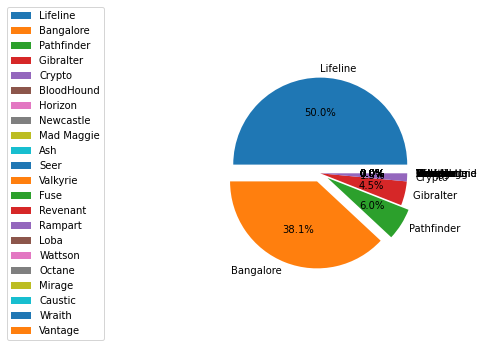

In [46]:
df_Harjas_Final = df_Harjas_Final.sort_values('Wins',ascending=False)
explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(df_Harjas_Final['Wins'], labels = df_Harjas_Final['Characters'],autopct='%1.1f%%', explode=explode)
plt.legend(loc='right', borderaxespad=32.5, labels  = df_Harjas_Final['Characters'])
plt.show()

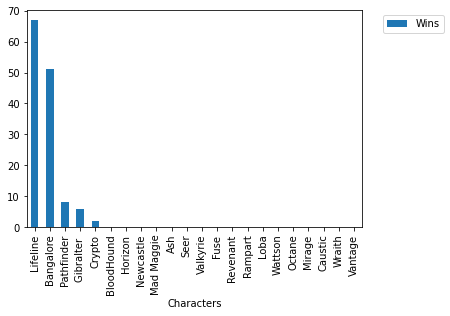

In [47]:
df_Harjas_Final.plot.bar(x='Characters', y='Wins')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [48]:
df_Harjas_WinsPercentage.sort_values
df_Harjas_Winstats = pd.concat([df_Harjas_Final.loc[:,"Characters"],(df_Harjas_WinsPercentage)], axis=1)
df_Harjas_Winstats

,Characters,Wins
2,Lifeline,50.000000
5,Bangalore,38.059701
3,Pathfinder,5.970149
1,Gibralter,4.477612
10,Crypto,1.492537
0,BloodHound,0.000000
14,Horizon,0.000000
20,Newcastle,0.000000
19,Mad Maggie,0.000000
18,Ash,0.000000


In [49]:
#Now that I can distinguish the top 3 mains, it was easy to place them into their own respective dataframes

In [50]:
df_Julian_Mains = df_Julian_Final.iloc[[0, 1, 2]]
df_Julian_Mains

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
3,Pathfinder,2730,910784,4582,128,1961,333.620513,464.448751,0.065273,30.695444,2.336563
0,BloodHound,1603,562319,2565,80,1304,350.791641,431.226227,0.061350,19.184652,1.967025
2,Lifeline,1225,383457,1600,68,894,313.026122,428.922819,0.076063,16.306954,1.789709


In [51]:
df_Diljit_Mains = df_Diljit_Final.iloc[[0, 1, 2]]
df_Diljit_Mains

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
3,Pathfinder,1880,580883,2419,101,1500,308.980319,387.255333,0.067333,33.666667,1.612667
8,Octane,586,167188,742,45,443,285.303754,377.399549,0.101580,15.000000,1.674944
10,Crypto,321,127607,392,22,311,397.529595,410.311897,0.070740,7.333333,1.260450


In [52]:
df_Tony_Mains = df_Tony_Final.iloc[[0, 1,2]]
df_Tony_Mains

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
8,Octane,1316,505373,2217,85,1111,384.022036,454.881188,0.076508,33.203125,1.995500
14,Horizon,1025,407679,1902,59,896,397.735610,454.998884,0.065848,23.046875,2.122768
11,Revenant,225,88862,337,16,194,394.942222,458.051546,0.082474,6.250000,1.737113


In [53]:
df_Harjas_Mains = df_Harjas_Final.iloc[[0, 1, 2]]
df_Harjas_Mains

,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
2,Lifeline,1133,367142,1697,67,1666,324.044131,220.373349,0.040216,50.000000,1.018607
5,Bangalore,781,305400,1328,51,1773,391.037132,172.250423,0.028765,38.059701,0.749013
3,Pathfinder,259,84392,397,8,455,325.837838,185.476923,0.017582,5.970149,0.872527


In [54]:
#Combined chart of the mains
df_Mains = pd.concat([df_Julian_Mains.T, df_Diljit_Mains.T, df_Tony_Mains.T, df_Harjas_Mains.T], axis=1)
df_Mains.columns = ['Julian Main','Julian 2nd Main', 'Julian 3rd Main', 'Diljit Main','Diljit 2nd Main', 'Diljit 3rd Main', 'Tony Main', 'Tony 2nd Main','Tony 3rd Main','Harjas Main', 'Harjas 2nd Main', 'Harjas 3rd Main']
df_Mains

,Julian Main,Julian 2nd Main,Julian 3rd Main,Diljit Main,Diljit 2nd Main,Diljit 3rd Main,Tony Main,Tony 2nd Main,Tony 3rd Main,Harjas Main,Harjas 2nd Main,Harjas 3rd Main
Characters,Pathfinder,BloodHound,Lifeline,Pathfinder,Octane,Crypto,Octane,Horizon,Revenant,Lifeline,Bangalore,Pathfinder
Kills,2730,1603,1225,1880,586,321,1316,1025,225,1133,781,259
Total Damage,910784,562319,383457,580883,167188,127607,505373,407679,88862,367142,305400,84392
Headshots,4582,2565,1600,2419,742,392,2217,1902,337,1697,1328,397
Wins,128,80,68,101,45,22,85,59,16,67,51,8
Total Games Played,1961,1304,894,1500,443,311,1111,896,194,1666,1773,455
DMG per Kill,333.620513,350.791641,313.026122,308.980319,285.303754,397.529595,384.022036,397.73561,394.942222,324.044131,391.037132,325.837838
DMG per Game,464.448751,431.226227,428.922819,387.255333,377.399549,410.311897,454.881188,454.998884,458.051546,220.373349,172.250423,185.476923
Win rate,0.065273,0.06135,0.076063,0.067333,0.10158,0.07074,0.076508,0.065848,0.082474,0.040216,0.028765,0.017582
Win Percentage,30.695444,19.184652,16.306954,33.666667,15.0,7.333333,33.203125,23.046875,6.25,50.0,38.059701,5.970149


In [55]:
#I spent 30 minutes trying to figure out how to reset the Y-Axis index and could not seem to figure it out. While not the optimal route, I converted the dataframes to excel, added main rank indicator to use as X axis, and reset the indexes
df_Julian_Main_New = pd.read_csv("Julian Data1.csv")
df_Diljit_Main_New = pd.read_csv("Diljit Data1.csv")
df_Harjas_Main_New = pd.read_csv("Harjas Data1.csv")
df_Tony_Main_New = pd.read_csv("Tony Data1.csv")

In [56]:
df_Julian_Main_New

,Main Rank,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,1,Pathfinder,2730,910784,4582,128,1961,333.620513,464.448751,0.065273,0.306954,2.336563
1,2,BloodHound,1603,562319,2565,80,1304,350.791641,431.226227,0.061350,0.191847,1.967025
2,3,Lifeline,1225,383457,1600,68,894,313.026122,428.922819,0.076063,0.163070,1.789709


In [57]:
df_Diljit_Main_New

,Main Rank,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,1,Pathfinder,1880,580883,2419,101,1500,308.980319,387.255333,0.067333,0.336667,1.612667
1,2,Octane,586,167188,742,45,443,285.303754,377.399548,0.101580,0.150000,1.674944
2,3,Crypto,321,127607,392,22,311,397.529595,410.311897,0.070740,0.073333,1.260450


In [58]:
df_Tony_Main_New

,Main Rank,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,1,Octane,1316,505373,2217,85,1111,384.022037,454.881188,0.076508,0.332031,1.995500
1,2,Horizon,1025,407679,1902,59,896,397.735610,454.998884,0.065848,0.230469,2.122768
2,3,Revenant,225,88862,337,16,194,394.942222,458.051546,0.082474,0.062500,1.737113


In [59]:
df_Harjas_Main_New

,Main Rank,Characters,Kills,Total Damage,Headshots,Wins,Total Games Played,DMG per Kill,DMG per Game,Win rate,Win Percentage,Accuracy
0,1,Lifeline,1133,367142,1697,67,1666,324.044131,220.373349,0.040216,0.500000,1.018607
1,2,Bangalore,781,305400,1328,51,1773,391.037132,172.250423,0.028765,0.380597,0.749013
2,3,Pathfinder,259,84392,397,8,455,325.837838,185.476923,0.017582,0.059701,0.872527


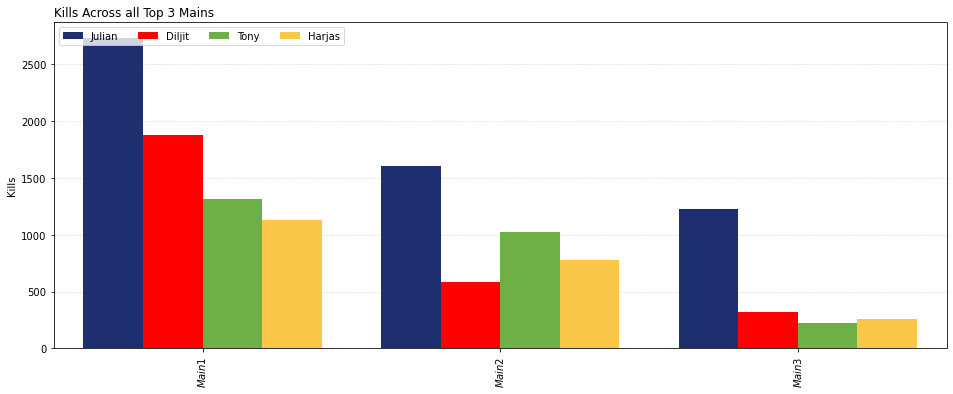

In [60]:
#Replication of the above barcharts but now only containing main character information
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['Kills'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['Kills'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['Kills'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['Kills'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Kills')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Kills Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

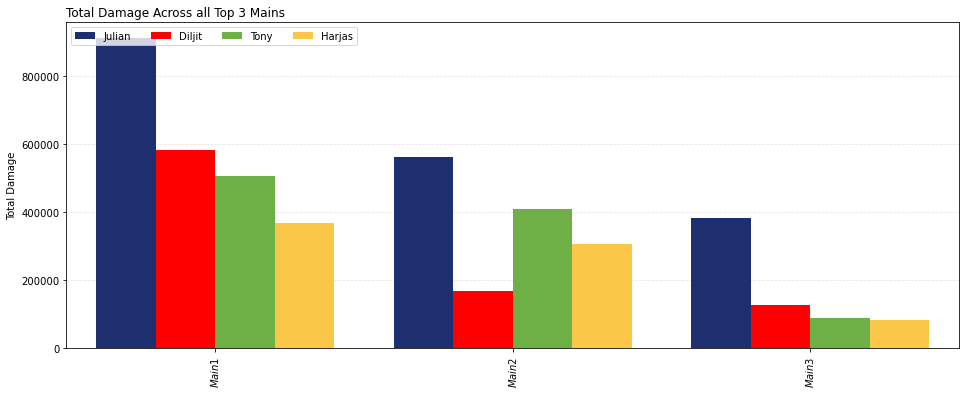

In [61]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['Total Damage'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['Total Damage'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['Total Damage'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['Total Damage'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Total Damage')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Total Damage Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

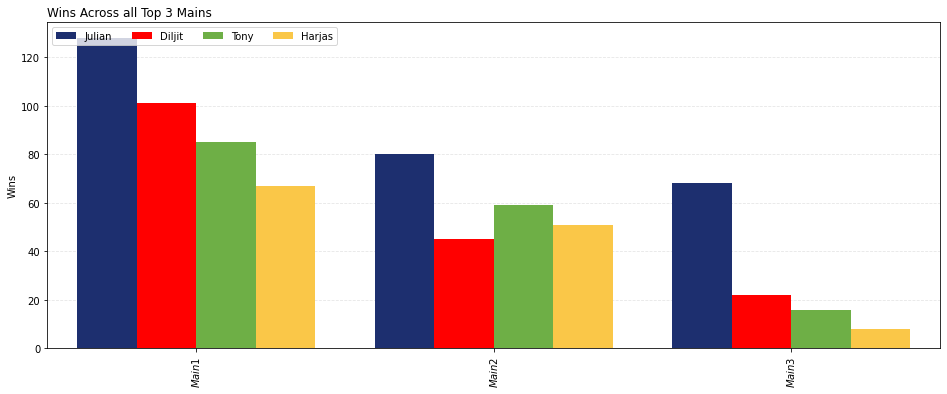

In [62]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['Wins'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['Wins'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['Wins'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['Wins'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Wins')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Wins Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

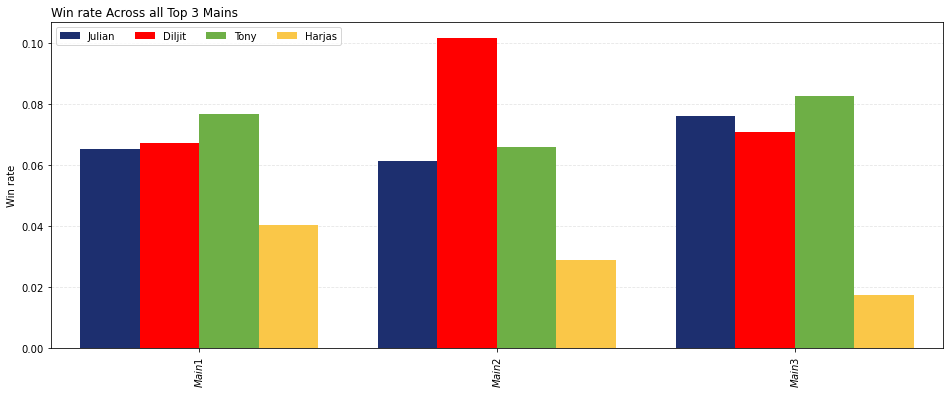

In [63]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['Win rate'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['Win rate'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['Win rate'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['Win rate'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Win rate')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Win rate Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

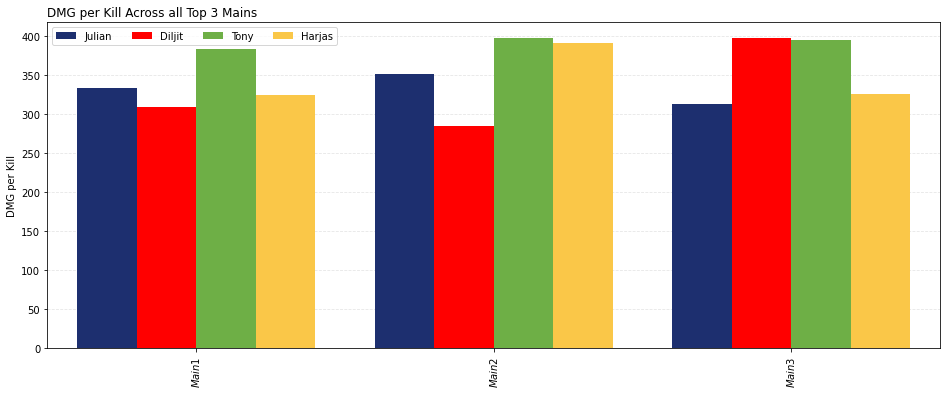

In [64]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['DMG per Kill']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['DMG per Kill'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['DMG per Kill'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['DMG per Kill'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['DMG per Kill'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('DMG per Kill')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('DMG per Kill Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

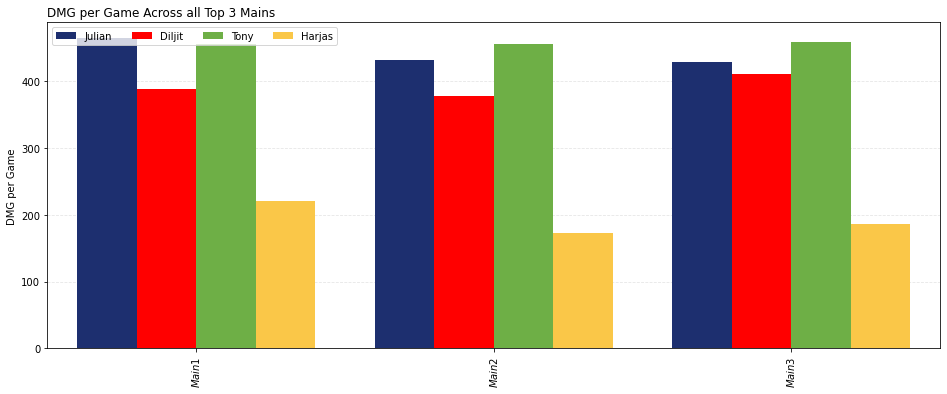

In [65]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['DMG per Game'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['DMG per Game'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['DMG per Game'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['DMG per Game'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('DMG per Game')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('DMG per Game Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

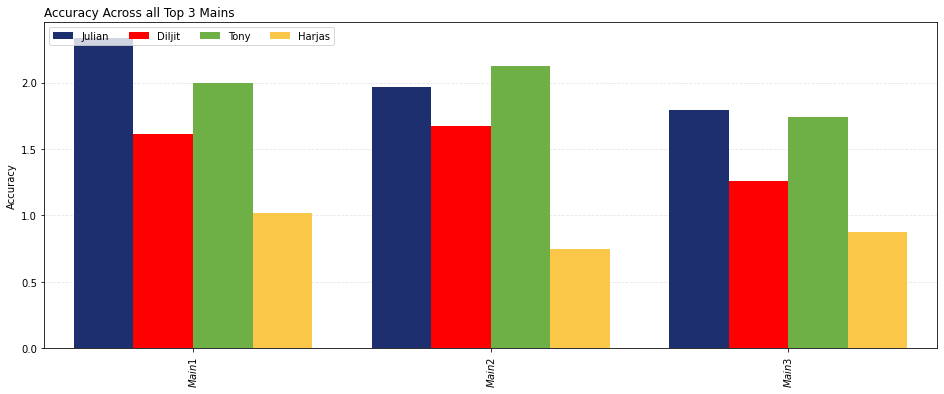

In [66]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_Julian_Main_New['Main Rank']))
# plot bars
plt.bar(x - 0.3, df_Julian_Main_New['Accuracy'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_Diljit_Main_New['Accuracy'], width = 0.2, color = 'r')
plt.bar(x + 0.1, df_Tony_Main_New['Accuracy'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_Harjas_Main_New['Accuracy'], width = 0.2, color = '#FAC748')

# x y details
plt.ylabel('Accuracy')
plt.xticks(x, df_Julian_Main_New.index,rotation=90)
ax.set_xticklabels((['$Main 1$', '$Main 2$', '$Main 3$']))
plt.xlim(-0.5, 2.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Accuracy Across all Top 3 Mains', loc ='left')
plt.legend(['Julian', 'Diljit', 'Tony', 'Harjas'], loc='upper left', ncol = 4)
plt.show()

In [67]:
#Data at this point was completed, decided to add a regession anaylsis to show a scatterplot format of kills/dmg and wins/total game for the top 3 mains per individual

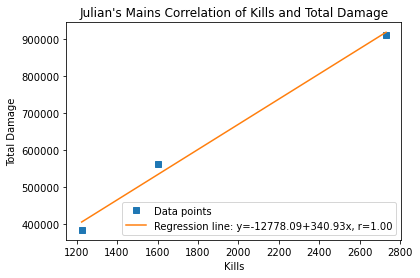

In [68]:
x = df_Julian_Main_New.loc[:,'Kills']
y = df_Julian_Main_New.loc[:,'Total Damage']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Kills')
ax.set_ylabel('Total Damage')
ax.legend(facecolor='white')
plt.title("Julian's Mains Correlation of Kills and Total Damage")
plt.show()

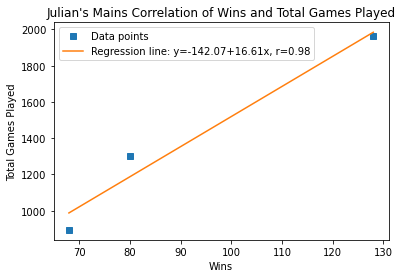

In [69]:
x = df_Julian_Main_New.loc[:,'Wins']
y = df_Julian_Main_New.loc[:,'Total Games Played']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Wins')
ax.set_ylabel('Total Games Played')
ax.legend(facecolor='white')
plt.title("Julian's Mains Correlation of Wins and Total Games Played")
plt.show()

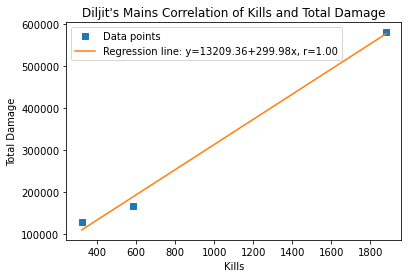

In [70]:
x = df_Diljit_Main_New.loc[:,'Kills']
y = df_Diljit_Main_New.loc[:,'Total Damage']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Kills')
ax.set_ylabel('Total Damage')
ax.legend(facecolor='white')
plt.title("Diljit's Mains Correlation of Kills and Total Damage")
plt.show()

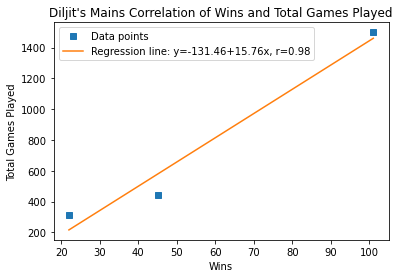

In [71]:
x = df_Diljit_Main_New.loc[:,'Wins']
y = df_Diljit_Main_New.loc[:,'Total Games Played']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Wins')
ax.set_ylabel('Total Games Played')
ax.legend(facecolor='white')
plt.title("Diljit's Mains Correlation of Wins and Total Games Played")
plt.show()

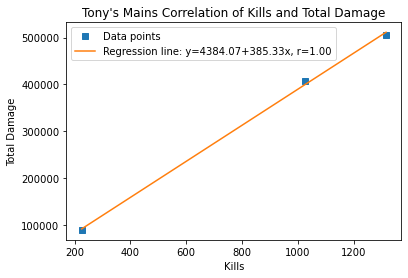

In [72]:
x = df_Tony_Main_New.loc[:,'Kills']
y = df_Tony_Main_New.loc[:,'Total Damage']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Kills')
ax.set_ylabel('Total Damage')
ax.legend(facecolor='white')
plt.title("Tony's Mains Correlation of Kills and Total Damage")
plt.show()

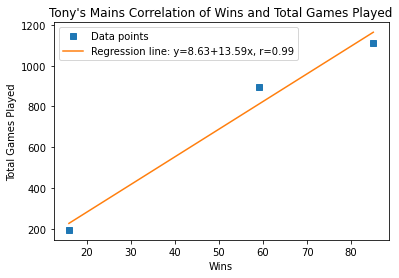

In [73]:
x = df_Tony_Main_New.loc[:,'Wins']
y = df_Tony_Main_New.loc[:,'Total Games Played']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Wins')
ax.set_ylabel('Total Games Played')
ax.legend(facecolor='white')
plt.title("Tony's Mains Correlation of Wins and Total Games Played")
plt.show()

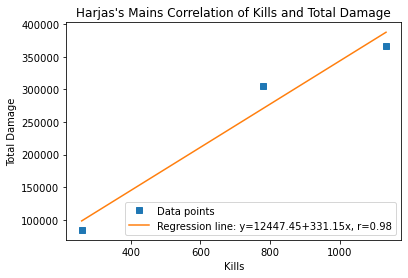

In [74]:
x = df_Harjas_Main_New.loc[:,'Kills']
y = df_Harjas_Main_New.loc[:,'Total Damage']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Kills')
ax.set_ylabel('Total Damage')
ax.legend(facecolor='white')
plt.title("Harjas's Mains Correlation of Kills and Total Damage")
plt.show()

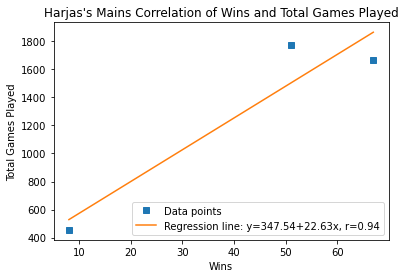

In [75]:
x = df_Harjas_Main_New.loc[:,'Wins']
y = df_Harjas_Main_New.loc[:,'Total Games Played']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Wins')
ax.set_ylabel('Total Games Played')
ax.legend(facecolor='white')
plt.title("Harjas's Mains Correlation of Wins and Total Games Played")
plt.show()